In [96]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [108]:
data = load_diabetes()
X = data.data
y = data.target

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_lin

2900.1936284934804

In [111]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge =  ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_ridge

2856.4868876706546

In [112]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso =  lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

2798.1934851697188

In [113]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.5, alpha=0.1)
elastic.fit(X_train, y_train)

y_pred_elastic =  elastic.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mse_elastic

4775.466767154695

In [114]:
print(f"Linear Regression MSE : {mse_lin:.2f}")
print(f"Ridge Regression MSE  : {mse_ridge:.2f}")
print(f"Lasso Regression MSE  : {mse_lasso:.2f}")
print(f"Elastic Net MSE       : {mse_elastic:.2f}")

Linear Regression MSE : 2900.19
Ridge Regression MSE  : 2856.49
Lasso Regression MSE  : 2798.19
Elastic Net MSE       : 4775.47


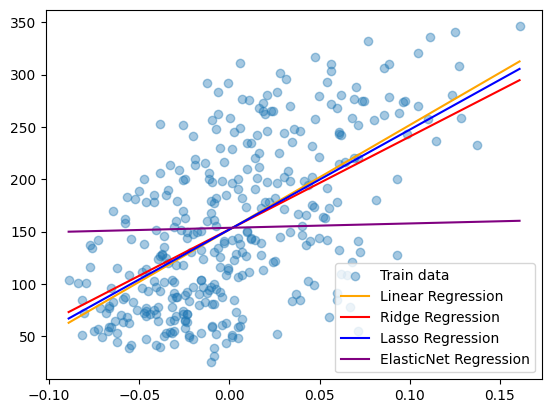

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

def train_plot(alpha, l1_ratio):
    X_train_one = X_train[:, 2].reshape(-1, 1)
    X_new = np.linspace(X_train_one.min(), X_train_one.max(), 100).reshape(-1, 1)
    models = [LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha), ElasticNet(alpha=alpha, l1_ratio=l1_ratio)]
    labels = ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"]
    colors = ["orange", "red", "blue", "purple"]
    
    plt.scatter(X_train_one, y_train, alpha=0.4, label="Train data")
    for model, label, color in zip(models, labels, colors):
        model.fit(X_train_one, y_train)
        prediction = model.predict(X_new)
        plt.plot(X_new, prediction, label=label, color=color)
    plt.legend()
    plt.show()

train_plot(0.1, 0.5)

In [130]:
def show_multiple_alpha(model_class):
    X_train_one = X_train[:, 2].reshape(-1, 1)
    X_new = np.linspace(X_train_one.min(), X_train_one.max(), 100).reshape(-1, 1)
    alphas = [0.01, 0.1, 1]
    colors = ["green", "red", "blue"]
    plt.scatter(X_train_one, y_train, color="blue", alpha= 0.2, label="Train Data")
    for alpha, color in zip(alphas,colors):
        model = model_class(alpha=alpha)
        model.fit(X_train_one, y_train)
        prediction = model.predict(X_new)
        plt.plot(X_new, prediction, label=f"α: {alpha}", color=color)

    plt.legend()
    plt.show()

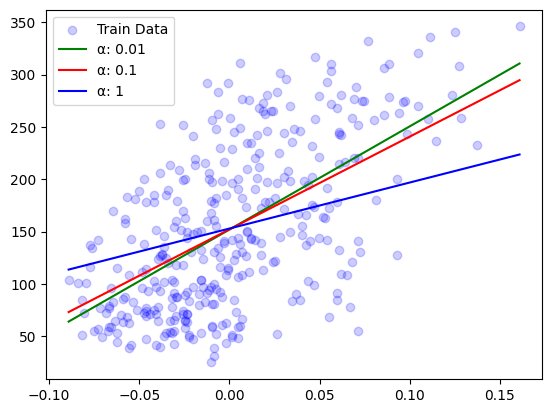

In [131]:
show_multiple_alpha(Ridge)

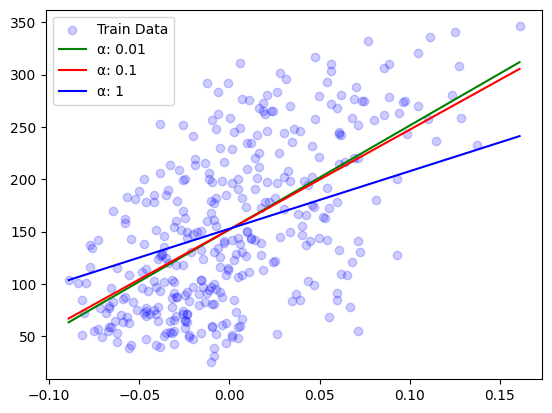

In [132]:
show_multiple_alpha(Lasso)